# Выбор локации для скважины

<h1>Содержание<span class='tocSkip'></span></h1>

* [1 Загрузка и подготовка данных](#my_section_1) <a id='content_1'></a>
  * [1.1 Загрузка данных](#my_section_2) <a id='content_2'></a>
  * [1.2 Ознакомление и корректировка](#my_section_3) <a id='content_3'></a>
    * [1.2.1 geo_data_0](#my_section_4) <a id='content_4'></a>
      * [1.2.1.1 Ознакомление](#my_section_5) <a id='content_5'></a>
      * [1.2.1.2 Изучение корреляции данных](#my_section_6) <a id='content_6'></a>
      * [1.2.1.3 Проверка на дубликаты](#my_section_7) <a id='content_7'></a>
      * [1.2.1.4 Изучение выбросов](#my_section_8) <a id='content_8'></a>
    * [1.2.2 geo_data_1](#my_section_9) <a id='content_9'></a>
      * [1.2.2.1 Ознакомление](#my_section_10) <a id='content_10'></a>
      * [1.2.2.2 Изучение корреляции данных](#my_section_11) <a id='content_11'></a>
      * [1.2.2.3 Проверка на дубликаты](#my_section_12) <a id='content_12'></a>
      * [1.2.2.4 Изучение выбросов](#my_section_13) <a id='content_13'></a>
    * [1.2.3 geo_data_2](#my_section_14) <a id='content_14'></a>
      * [1.2.3.1 Ознакомление](#my_section_15) <a id='content_15'></a>
      * [1.2.3.2 Изучение корреляции данных](#my_section_16) <a id='content_16'></a>
      * [1.2.3.3 Проверка на дубликаты](#my_section_17) <a id='content_17'></a>
      * [1.2.3.4 Изучение выбросов](#my_section_18) <a id='content_18'></a>
  * [1.3 Подготовка данных](#my_section_19) <a id='content_19'></a>
    * [1.3.1 geo_data_0](#my_section_20) <a id='content_20'></a>
    * [1.3.2 geo_data_1](#my_section_21) <a id='content_21'></a>
    * [1.3.3 geo_data_2](#my_section_22) <a id='content_22'></a>
  * [1.4 Заключение](#my_section_23) <a id='content_23'></a>
* [2 Обучение и проверка модели](#my_section_24) <a id='content_24'></a>
  * [2.1 geo_data_0](#my_section_25) <a id='content_25'></a>
  * [2.2 geo_data_1](#my_section_26) <a id='content_26'></a>
  * [2.3 geo_data_2](#my_section_27) <a id='content_27'></a>
  * [2.4 Анализ](#my_section_28) <a id='content_28'></a>
    * [2.4.1 Средний запас предсказанного сырья](#my_section_29) <a id='content_29'></a>
    * [2.4.2 RMSE](#my_section_30) <a id='content_30'></a>
  * [2.5 Заключение](#my_section_31) <a id='content_31'></a>
* [3 Подготовка к расчёту прибыли](#my_section_32) <a id='content_32'></a>
  * [3.1 Сохранение ключевых значений](#my_section_33) <a id='content_33'></a>
  * [3.2 Рассчёт безубыточной разработки](#my_section_34) <a id='content_34'></a>
  * [3.3 Определим функцию для рассчёта прибыли](#my_section_35) <a id='content_35'></a>
  * [3.4 Заключение](#my_section_36) <a id='content_36'></a>
* [4 Расчёт прибыли и рисков ](#my_section_37) <a id='content_37'></a>
  * [4.1 Рассчётная часть](#my_section_38) <a id='content_38'></a>
  * [4.2 Заключение](#my_section_39) <a id='content_39'></a>


**Описание проекта:**

Нужно решить, где бурить новую скважину. Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. Дополнительно требуется проанализировать возможную прибыль и риски техникой Bootstrap.

**Главная задача:** Решить, где бурить скважину.

**Подзадачи:**
- В избранном регионе собрать характеристики для скважин: качество нефти и объём её запасов;
- Построить модель для предсказания объёма запасов в новых скважинах;
- Выбрать скважины с самыми высокими оценками значений;
- Определить регион с максимальной суммарной прибылью отобранных скважин.

**План работы:**
1. Загрузить и подготовить данные;
2. Обучить и проверить модель для каждого региона;
3. Подготовиться к расчёту прибыли;
4. Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели;
5. Посчитать риски и прибыль для каждого региона.

**Описание данных**

Данные геологоразведки трёх регионов находятся в файлах: 
- geo_data_0.csv 
- geo_data_1.csv
- geo_data_2.csv

*Описание столбцов:*
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

*Заметка:*
1. предполагаемые действия будут обозначены текстом без форматирования;
2. *курсивом* — небольшие выводы и заключения по ячейкам.

<a id='my_section_1'></a>
## [Загрузка и подготовка данных](#content_1)

В этом этапе будет проведена загрузка библиотек и модулей, загрузка и ознакомление с данными, их подготовка. В этап подготовки будет входить разделение данных на выборки и масштабирование при необходимости.

<a id='my_section_2'></a>
### [Загрузка данных](#content_2)

Импортируем библиотеки и модули для  работы

In [1]:
from IPython.display import display

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Определим функцию и загрузим данные

In [2]:
def download_data(name):
    file_path = '/datasets/'
    file_path_2 = 'https://..'
    try:
        data = pd.read_csv(name+'.csv')
        
    except FileNotFoundError:
        try:
            data = pd.read_csv(file_path+name+'.csv')
        except FileNotFoundError:
            data = pd.read_csv(file_path_2+name+'.csv')
        
    except Exception as ex:
        print('Some error', ex)
        
    return data

In [3]:
geo_data_0 = download_data('geo_data_0')
geo_data_1 = download_data('geo_data_1')
geo_data_2 = download_data('geo_data_2')

*Загрузка проведена без ошибок*

<a id='my_section_3'></a>
### [Ознакомление и корректировка](#content_3)

Получим общую информацию о данных по каждому региону.

<a id='my_section_4'></a>
#### [geo_data_0](#content_4)

<a id='my_section_5'></a>
##### [Ознакомление](#content_5)

Изучим первые строки датафрейма

In [4]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


*Заметно, что признаки нуждаются в масштабировании, столбец id носит уникальные параметры.*

Изучим каких типов данных столбцы и наличие пропусков.

In [5]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


*Пропусков нет, типы данных в порядке.*

<a id='my_section_6'></a>
##### [Изучение корреляции данных](#content_6)

In [6]:
geo_data_0_corr = geo_data_0.corr(numeric_only=True)
geo_data_0_corr

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


Вместо использования громоздкой функции `scatter_matrix` определим свою:

In [7]:
def corr_plot(geo_data_0):
    col = geo_data_0.drop(['id'], axis=1).columns
    for i in range(len(col)-1):
        corr_col = col[i+1:]
        fig, ax = plt.subplots(1, len(corr_col), figsize=(len(corr_col)*(1/0.2),3))
        fig.suptitle(f'Корреляция с {col[i]}', fontsize=14, fontweight='bold')
        fig.subplots_adjust(top=0.8)
        for j in range(len(corr_col)):
            if len(corr_col) != 1:
                ax[j].scatter(x=geo_data_0[col[i]], y=geo_data_0[corr_col[j]], alpha=0.4)
                ax[j].grid()
                ax[j].set_ylabel(col[i], rotation=0)
                ax[j].set_xlabel(corr_col[j])
            else:
                ax.scatter(x=geo_data_0[col[i]], y=geo_data_0[corr_col[j]], alpha=0.4)
                ax.grid()
                ax.set_ylabel(col[i], rotation=0)
                ax.set_xlabel(corr_col[j])

   

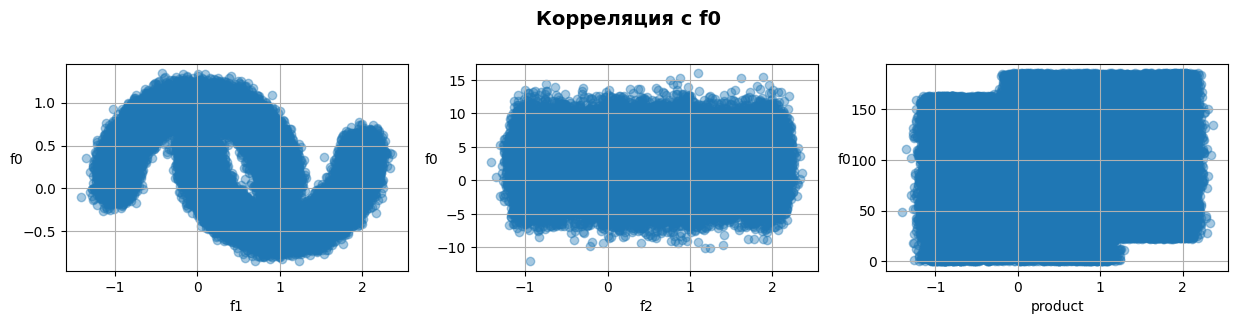

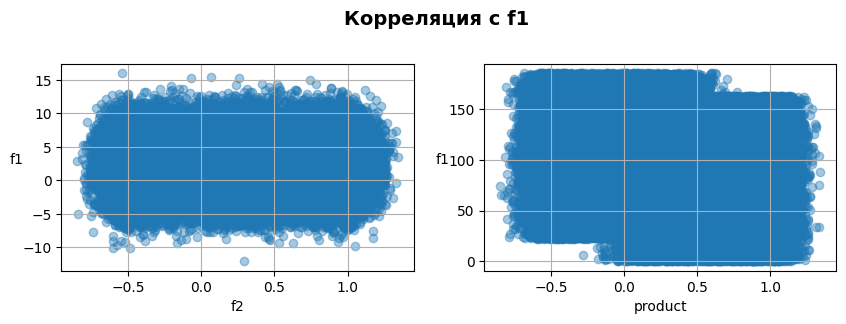

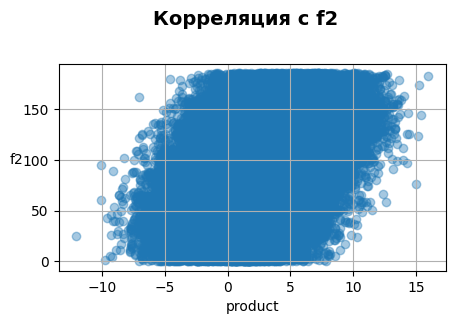

In [8]:
corr_plot(geo_data_0); 

*Сильной корреляции признаков не наблюдается.*

<a id='my_section_7'></a>
##### [Проверка на дубликаты](#content_7)

Пройдемся по каждому столбцу для поиска дубликатов, определим функцию.

In [9]:
def some_dub(geo_data_0):
    for el in geo_data_0.columns:
        some_dub = geo_data_0.loc[:, el].duplicated().sum()
        if some_dub > 0:
            print(f'В столбце {el} — {some_dub} дубликат(а/ов)')

In [10]:
some_dub(geo_data_0)

В столбце id — 10 дубликат(а/ов)


*Существовала вероятность, что дубликаты будут и в остальных столбцах, роль могла сыграть случайность, однако, дубликаты обнаружены только в столбце с уникальным идентификатором.*

Данных не много, попробуем разобраться в их природе

In [11]:
def split_dup(geo_data_0, col='id', to=6, step=2):   
    dup = geo_data_0.loc[geo_data_0[col].duplicated(), :][col]
    for el in dup[:to:step]:
        display(geo_data_0.loc[geo_data_0[col] == el, :].head(5))
    return dup

In [12]:
dup = split_dup(geo_data_0) 

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695


,id,f0,f1,f2,product
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


,id,f0,f1,f2,product
64022,74z30,0.741456,0.459229,5.153109,140.771492
66136,74z30,1.084962,-0.312358,6.990771,127.643327


*Предположительно, данные корректны за исключением столбца `id`(вероятно, что допущена ошибка в присвоении уникального идентификатора), дальнейшая обработка предполагает избавление от этого столбца с сохранением индекса позиций для возможности их дальнейшего восстановления. Предполагаем, что оставить дубликаты с сохранением информации об этом для уточнения у заказчика будет корректно. Ведь качество модели машинного обучения не будет зависить от столбца `id`, а только от остальных признаков.*

In [13]:
geo_data_0_duplicates_id = geo_data_0.query('id in @dup').sort_values(by='id', ascending=False)

<a id='my_section_8'></a>
##### [Изучение выбросов](#content_8)

Получим общее представление о данных, используя метод `describe`

In [14]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Визуализируем данные методом `boxplot`

In [15]:
def overview_borders(geo_data_0): 
    moustache = {}
    # Построение смежных графиков
    fig, ax = plt.subplots(2, 2, figsize=(10,8))
    fig.suptitle('Ящики с усами', fontsize=14, fontweight='bold')
    fig.subplots_adjust(top=0.9)
    col = {'f0':[0,0], 'f1':[0,1], 'f2':[1,0], 'product':[1,1]}
    # Установка параметров
    for key, val in col.items():
        x = val[0]
        y = val[1]
        name = key
        b = ax[x, y].boxplot(geo_data_0[name])
        # Выделение крайних усов боксплота
        moustache[key] = [item.get_ydata()[1] for item in b['whiskers']]
        ax[x, y].grid()
        ax[x, y].set_title(name)
        ax[x, y].tick_params('x', labelrotation = 0)
        #ax[0, 0].set_xlabel('f0')
        ax[x, y].set_ylabel('Значимые признаки')
    return moustache

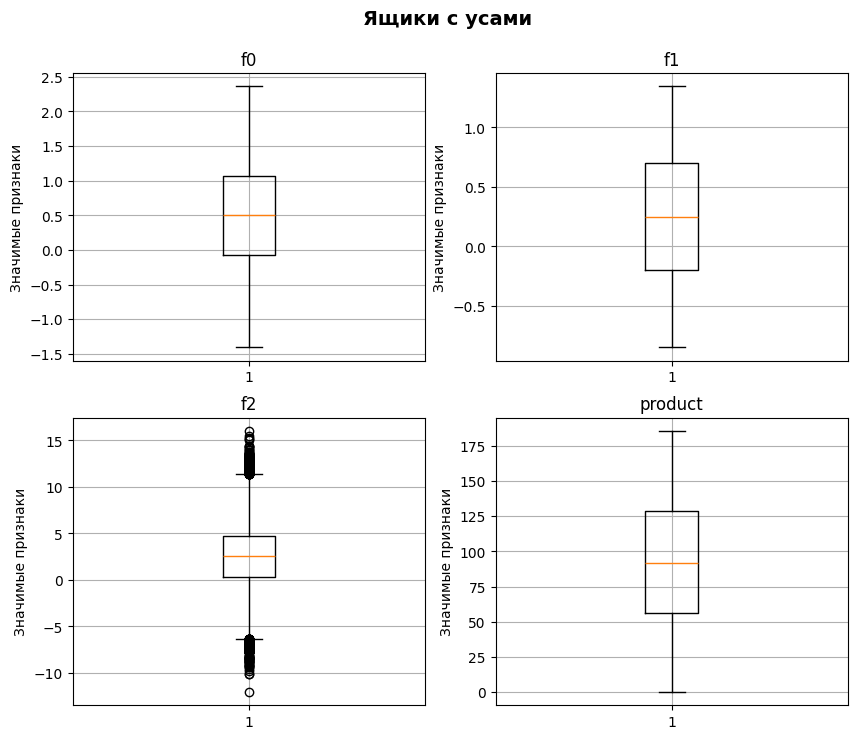

In [16]:
moustache_0 = overview_borders(geo_data_0)

Изучим границы усов

In [17]:
moustache_0

{'f0': [-1.408605306026996, 2.362330810854224],
 'f1': [-0.8482184970082173, 1.343769333804496],
 'f2': [-6.352956245317204, 11.353803862227108],
 'product': [0.0, 185.3643474222929]}

Определим функцию для корректировки датасета

In [18]:
def make_limit(geo_data_0):
    for key, val in moustache_0.items():
        geo_data_0 =\
        geo_data_0.loc[(geo_data_0[key] >= val[0]) & (geo_data_0[key] <= val[1]), :]
        
    return geo_data_0

*Проводить корректировку значений будет не правильно, если мы хотим отобрать самые удачные скважины. Функцию оставим на случай корректировок. Наиболее удачная корректировка может быть по нижней границе столбца `product`, но выбросов там не наблюдается.*

<a id='my_section_9'></a>
#### [geo_data_1](#content_9)

<a id='my_section_10'></a>
##### [Ознакомление](#content_10)

Изучим первые строки датафрейма

In [19]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


*Заметно, что признаки нуждаются в масштабировании, столбец id носит уникальные параметры.*

Изучим каких типов данных столбцы и наличие пропусков.

In [20]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


*Пропусков нет, типы данных в порядке.*

<a id='my_section_11'></a>
##### [Изучение корреляции данных](#content_11)

In [21]:
geo_data_1_corr = geo_data_1.corr(numeric_only=True)
geo_data_1_corr

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


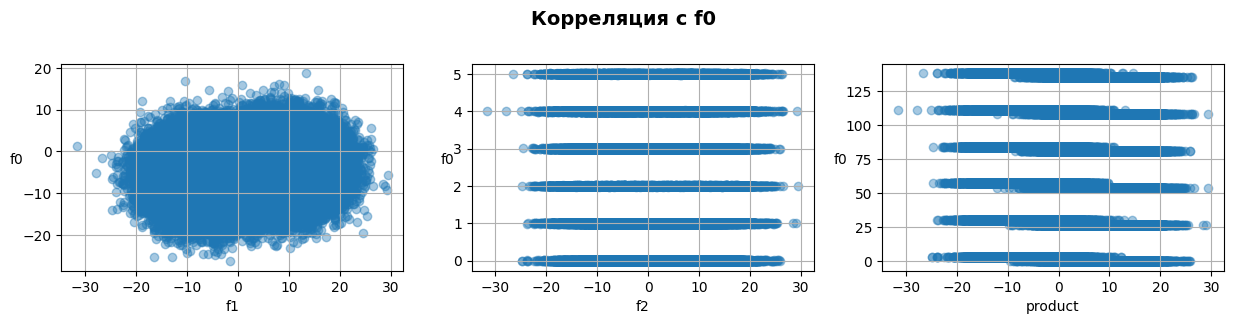

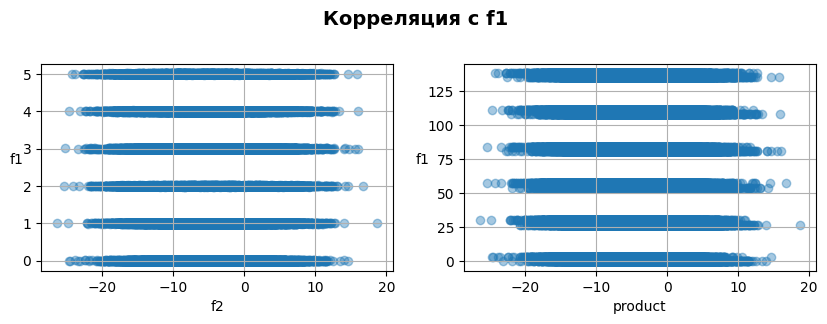

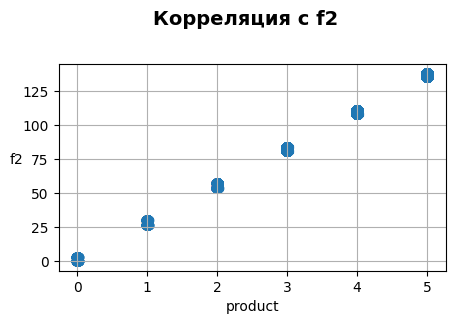

In [22]:
corr_plot(geo_data_1); 

*Сильной корреляции признаков не наблюдается. Данные выглядят подозрительно, относительно региона 1.*

<a id='my_section_12'></a>
##### [Проверка на дубликаты](#content_12)

Обнаружим дубликаты по каждому столбцу таблицы, используем определённую функцию `some_dub`

In [23]:
some_dub(geo_data_1)

В столбце id — 4 дубликат(а/ов)
В столбце product — 99988 дубликат(а/ов)


**Столбец id**

Изучим природу дубликатов в столбце `id`.

In [24]:
dup = split_dup(geo_data_1, to=4,step=1) 

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625


,id,f0,f1,f2,product
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886


,id,f0,f1,f2,product
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


*Предполагаем, что оставить дубликаты с сохранением информации об этом для уточнения у заказчика будет корректно. Ведь качество модели машинного обучения не будет зависить от столбца id, а только от остальных признаков.*

In [25]:
geo_data_1_duplicates_id = geo_data_1.query('id in @dup').sort_values(by='id', ascending=False)

**Столбец product**

Проверим что произойдёт, если избавиться от дубликатов в столбце `product`

In [26]:
geo_data_1.drop_duplicates(subset='product').shape

(12, 5)

*Из 10000 значений останется только 12 строк. Это значит что данные по региону разбиты на группы.*

Проведём обзор полученных значений

In [27]:
geo_data_1.drop_duplicates(subset='product')

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
11,OXyvW,16.320755,-0.562946,-0.001783,0.000000
12,cB8re,7.736313,-6.093374,3.982531,107.813044
25,AOrbK,2.338888,-8.508383,2.008130,57.085625


Посчитаем количество строк для определённого значения в колонке `product`.

In [28]:
geo_data_1['product'].value_counts()

product
53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: count, dtype: int64

*Если `id` — это уникальный идентификатор скважины, выходит, что в регионе 12 крупных месторождений, куда ведут около 8300 скважин в каждое, либо в данных ошибка.*

Изучим какие значения встречаются в группах для остальных признаков.

In [29]:
split_dup(geo_data_1, col='product', to=2,step=1); 

,id,f0,f1,f2,product
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
17,gIqzq,8.900460,-5.632857,4.994324,134.766305
21,eVFPS,2.195392,-3.829295,4.993895,134.766305


,id,f0,f1,f2,product
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
17,gIqzq,8.900460,-5.632857,4.994324,134.766305
21,eVFPS,2.195392,-3.829295,4.993895,134.766305


*Лучшим вариантом будет оставить данные как есть. Следующим этапом нужно уведомить ответственное лицо о проблеме. В случае подгрузки корректной информации дальнейшие наработки примут правильный вид, но исследование придётся дорабатывать.*

<a id='my_section_13'></a>
##### [Изучение выбросов](#content_13)

Получим общее представление о данных, используя метод `describe`

In [30]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Визуализируем данные методом `boxplot`

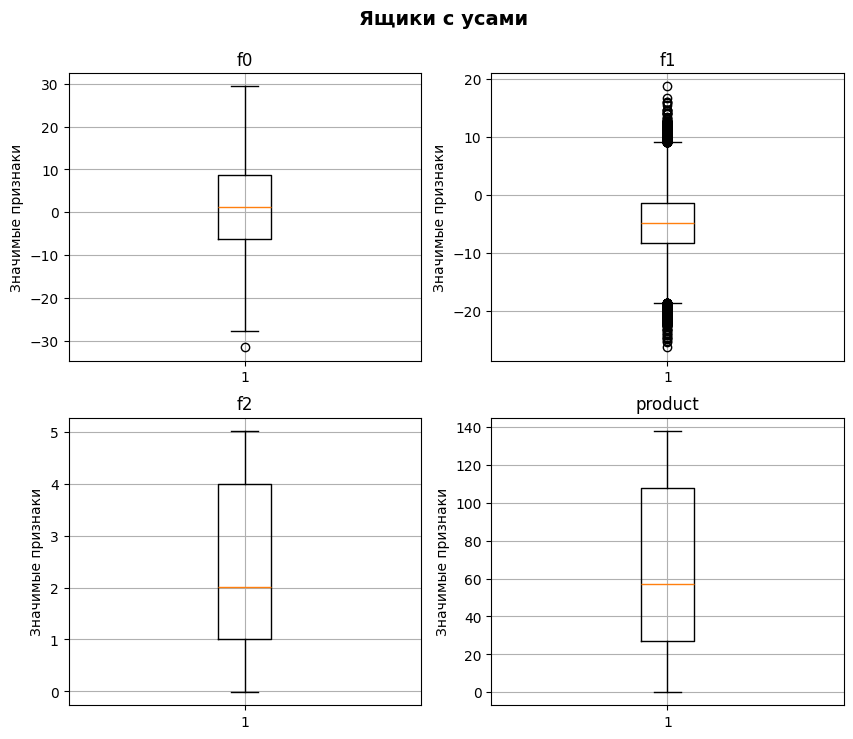

In [31]:
moustache_1 = overview_borders(geo_data_1)

Изучим границы усов

In [32]:
moustache_1

{'f0': [-27.829616136400016, 29.42175461390372],
 'f1': [-18.66777679200792, 9.05068813075942],
 'f2': [-0.0181440867134202, 5.019720555223062],
 'product': [0.0, 137.94540774090564]}

*Проводить корректировку значений будет не правильно, если мы хотим отобрать самые удачные скважины. Наиболее удачная корректировка может быть по нижней границе столбца `product`, но выбросов там не наблюдается.*

<a id='my_section_14'></a>
#### [geo_data_2](#content_14)

<a id='my_section_15'></a>
##### [Ознакомление](#content_15)

Изучим первые строки датафрейма

In [33]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


*Заметно, что признаки нуждаются в масштабировании, столбец id носит уникальные параметры.*

Изучим каких типов данных столбцы и наличие пропусков.

In [34]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


*Пропусков нет, типы данных в порядке.*

<a id='my_section_16'></a>
##### [Изучение корреляции данных](#content_16)

In [35]:
geo_data_2_corr = geo_data_2.corr(numeric_only=True)
geo_data_2_corr

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


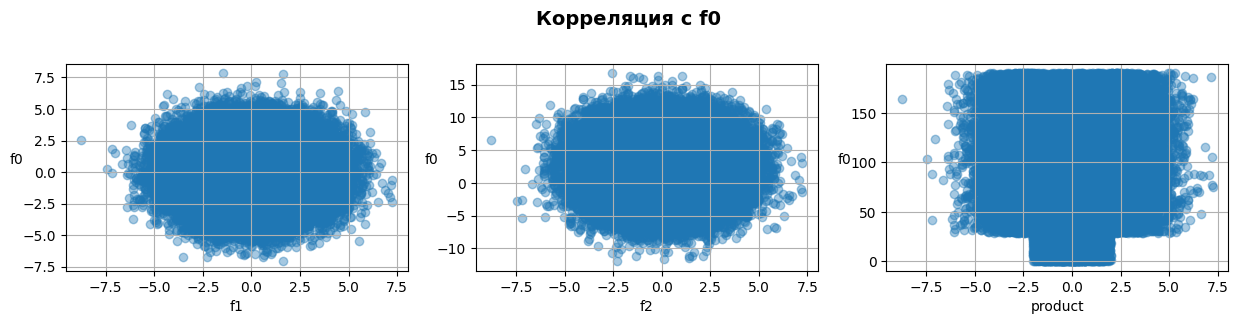

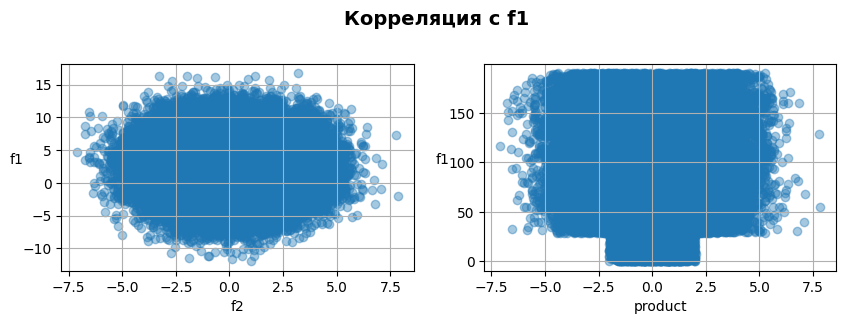

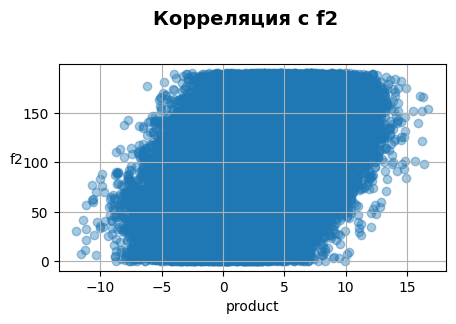

In [36]:
corr_plot(geo_data_2); 

*Сильной корреляции признаков не наблюдается.*

<a id='my_section_17'></a>
##### [Проверка на дубликаты](#content_17)

Обнаружим дубликаты по каждому столбцу таблицы, используем определённую функцию `some_dub`

In [37]:
some_dub(geo_data_2)

В столбце id — 4 дубликат(а/ов)


Изучим природу дубликатов в столбце `id`.

In [38]:
dup = split_dup(geo_data_2, to=4,step=1) 

,id,f0,f1,f2,product
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802


,id,f0,f1,f2,product
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


*Предполагаем, что оставить дубликаты с сохранением информации об этом для уточнения у заказчика будет корректно. Ведь качество модели машинного обучения не будет зависить от столбца id, а только от остальных признаков.*

In [39]:
geo_data_2_duplicates_id = geo_data_2.query('id in @dup').sort_values(by='id', ascending=False)

<a id='my_section_18'></a>
##### [Изучение выбросов](#content_18)

Получим общее представление о данных, используя метод `describe`

In [40]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Визуализируем данные методом `boxplot`

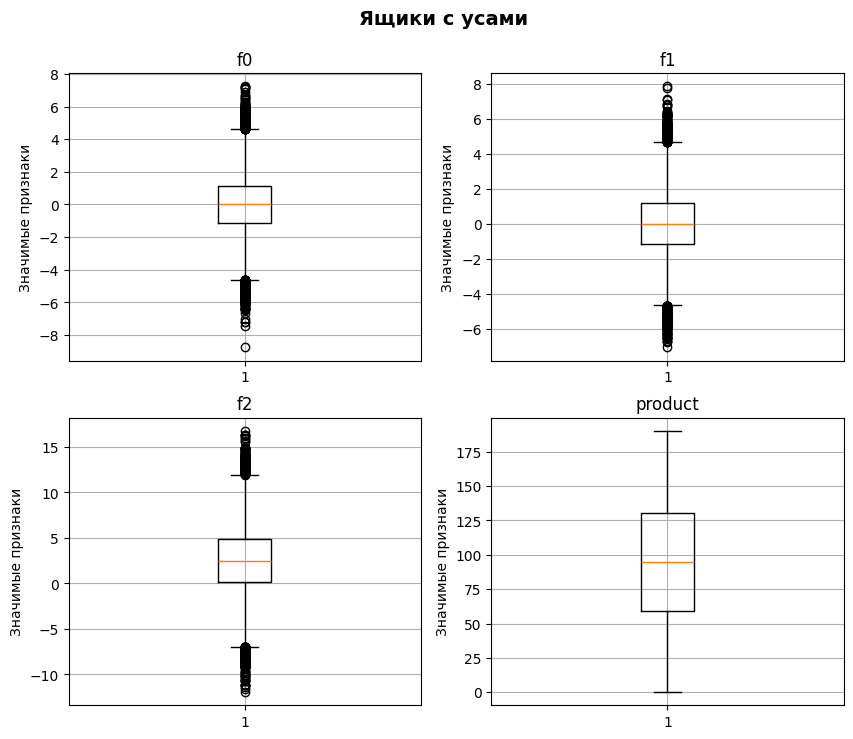

In [41]:
moustache_2 = overview_borders(geo_data_2)

Изучим границы усов

In [42]:
moustache_2

{'f0': [-4.6408299374502215, 4.637964787684985],
 'f1': [-4.682104027590131, 4.670610174332134],
 'f2': [-6.944602170854223, 11.945919471303876],
 'product': [0.0, 190.0298383433513]}

*Проводить корректировку значений будет не правильно, если мы хотим отобрать самые удачные скважины. Наиболее удачная корректировка может быть по нижней границе столбца `product`, но выбросов там не наблюдается.*

<a id='my_section_19'></a>
### [Подготовка данных](#content_19)

По результату ознакомления с данными выявлено, что для создания корректной модели машинного обучения и ёё упрощения нужно отделить столбец `id`, определить ключевой и обучающие признаки, разделить данные на выборки, масштабировать их. Если понадобиться, то вдальнейшим сопоставить `id` с полученной таблицей можно по индексу.

<a id='my_section_20'></a>
#### [geo_data_0](#content_20)

Определим функцию и разделим значения

In [43]:
def split_data(geo_data_0):
    geo_data_0_index = geo_data_0.loc[:, 'id']
    geo_data_0 = geo_data_0.drop(['id'], axis=1)
    return geo_data_0_index, geo_data_0

In [44]:
geo_data_0_index, geo_data_0 = split_data(geo_data_0)

Прежде чем масштабировать, изучим разброс значений. Определим функцию, считающую разницу между максимумом и минимумом.

In [45]:
def min_max(geo_data_0):
    for el in geo_data_0.columns:
        print(f"{el} min-max: "  
              f"{geo_data_0[el].min() - geo_data_0[el].max() :.4};"
             )

In [46]:
min_max(geo_data_0)

f0 min-max: -3.771;
f1 min-max: -2.192;
f2 min-max: -28.09;
product min-max: -185.4;


Определим обучающие признаки и целевой, затем разделим выборки на обучающую и валидационную в процентном соотношении 75:25, затем масштабируем признаки, чтобы не повторяться определим функцию.

In [47]:
def preparation_data(geo_data_0):
    # Разделяем датафрейм на признаки
    features_0 = geo_data_0.drop(['product'], axis=1)
    target_0 = geo_data_0['product']
    
    # Формируем обучающую и валидационную выборки
    features_train_0, features_valid_0, target_train_0, target_valid_0 =\
    train_test_split(features_0, target_0, test_size=.25, random_state=12345)
    
    # Применяем масштабирование
    scaler = StandardScaler()
    numeric = features_0.columns
    scaler.fit(features_train_0[numeric])
    pd.options.mode.chained_assignment = None
    features_train_0.loc[:, numeric] = scaler.transform(features_train_0.loc[:, numeric])
    features_valid_0.loc[:, numeric] = scaler.transform(features_valid_0.loc[:, numeric])
    return features_train_0, features_valid_0, target_train_0, target_valid_0

In [48]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = preparation_data(geo_data_0)

Оценим полученные результаты

In [49]:
features_train_0.head()

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


In [50]:
min_max(features_train_0)

f0 min-max: -4.325;
f1 min-max: -4.347;
f2 min-max: -8.045;


*Преобразование успешно*

<a id='my_section_21'></a>
#### [geo_data_1](#content_21)

Разделим значения

In [51]:
geo_data_1_index, geo_data_1 = split_data(geo_data_1)

Изучим разброс

In [52]:
min_max(geo_data_1)

f0 min-max: -61.03;
f1 min-max: -45.09;
f2 min-max: -5.038;
product min-max: -137.9;


Определим обучающие признаки и целевой, затем разделим выборки на обучающую и валидационную в процентном соотношении 75:25, затем масштабируем признаки.

In [53]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = preparation_data(geo_data_1)

Оценим полученные результаты

In [54]:
features_train_1.head()

,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


In [55]:
min_max(features_train_1)

f0 min-max: -6.807;
f1 min-max: -8.795;
f2 min-max: -2.959;


*Преобразование проведено*

<a id='my_section_22'></a>
#### [geo_data_2](#content_22)


Разделим значения

In [56]:
geo_data_2_index, geo_data_2 = split_data(geo_data_2)

Изучим разброс

In [57]:
min_max(geo_data_2)

f0 min-max: -16.0;
f1 min-max: -14.93;
f2 min-max: -28.71;
product min-max: -190.0;


Определим обучающие признаки и целевой, затем разделим выборки на обучающую и валидационную в процентном соотношении 75:25, затем масштабируем признаки.

In [58]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = preparation_data(geo_data_2)

Оценим полученные результаты

In [59]:
features_train_2.head()

,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


In [60]:
min_max(features_train_2)

f0 min-max: -9.237;
f1 min-max: -8.623;
f2 min-max: -8.269;


*Преобразование проведено*

<a id='my_section_23'></a>
### [Заключение](#content_23)

1. проведена загрузка и ознакомление с данными; 
2. выявлены дубликаты в значениях и ошибки для региона №2(geo_data_1) в столбце `product`:
  - дубликаты для столбца `id` были оставлены с сохранением значения для дальнейшего устранения. Ошибка произошла только в столбце `id`, который из-за уникальности значений не имеет ценности в формировании модели машинного обучения;
  - для региона №2 данные оставлены как есть, на случай, когда будут получены корректные значения. При устранении дубликатов данные не имеют ценности для анализа/диагностики(из 10000 значений только 12 уникальны). 
  

3. построены ящики с усами, изучен разброс; 
4. данные разбиты на валидационные и обучающие выборки;
5. данные масштабированы.

**Вывод:**





Осуществлена предобработка данных, можно приступать к обучению модели.

<a id='my_section_24'></a>
## [Обучение и проверка модели](#content_24)

В этой главе по каждому региону будет обучена модель и сделаны предсказания на валидационной выборке. Будут проведён рассчёт RMSE модели и среднего запаса предсказанного сырья. 

<a id='my_section_25'></a>
### [geo_data_0](#content_25)

Создадим и обучим модель. Работать будем с выборками:
- features_train_0;
- features_valid_0;
- target_train_0;
- target_valid_0.

In [61]:
def model_geo_data(features_train_0, features_valid_0,
                   target_train_0, target_valid_0, geo_data_0):
    # Инициализация модели, обучение и предсказание
    model = LinearRegression()
    model.fit(features_train_0, target_train_0)
    predictions_valid = model.predict(features_valid_0)
    # Получение средний запас предсказанного сырья
    #  и метрики RMSE 
    pred_prod_mean = predictions_valid.mean()
    rmse = mean_squared_error(target_valid_0, predictions_valid)**0.5
    # Вывод на экран результатов
    print(f"Средний запас предсказанного сырья {pred_prod_mean}")
    print(f"Истинный средний запас сырья {geo_data_0['product'].mean()}")
    print(f"RMSE модели на валидационной выборке: {rmse}")
    
    return predictions_valid, pred_prod_mean, rmse

In [62]:
var_0 = [features_train_0, features_valid_0, target_train_0, target_valid_0, geo_data_0]
predictions_valid_0, pred_prod_mean_0, rmse_0 = model_geo_data(*var_0)

Средний запас предсказанного сырья 92.59256778438035
Истинный средний запас сырья 92.50000000000001
RMSE модели на валидационной выборке: 37.5794217150813


*Предсказания и правильные ответы на валидационной выборке сохранены соответственно в переменные:*
1. predictions_valid_0;
2. target_valid_0.

<a id='my_section_26'></a>
### [geo_data_1](#content_26)

Создадим и обучим модель. Работать будем с выборками:
- features_train_1;
- features_valid_1;
- target_train_1;
- target_valid_1.

In [63]:
var_1 = [features_train_1, features_valid_1, target_train_1, target_valid_1, geo_data_1]
predictions_valid_1, pred_prod_mean_1, rmse_1 = model_geo_data(*var_1)

Средний запас предсказанного сырья 68.728546895446
Истинный средний запас сырья 68.82500000000002
RMSE модели на валидационной выборке: 0.893099286775617


*Предсказания и правильные ответы на валидационной выборке сохранены соответственно в переменные:*
1. predictions_valid_1;
2. target_valid_1.

<a id='my_section_27'></a>
### [geo_data_2](#content_27)

Создадим и обучим модель. Работать будем с выборками:
- features_train_2;
- features_valid_2;
- target_train_2;
- target_valid_2.

In [64]:
var_2 = [features_train_2, features_valid_2, target_train_2, target_valid_2, geo_data_2]
predictions_valid_2, pred_prod_mean_2, rmse_2 = model_geo_data(*var_2)

Средний запас предсказанного сырья 94.96504596800489
Истинный средний запас сырья 95.00000000000004
RMSE модели на валидационной выборке: 40.02970873393434


*Предсказания и правильные ответы на валидационной выборке сохранены соответственно в переменные:*
1. predictions_valid_2;
2. target_valid_2.

<a id='my_section_28'></a>
### [Анализ](#content_28)


Оценим полученные результаты по регионам

<a id='my_section_29'></a>
#### [Средний запас предсказанного сырья](#content_29)

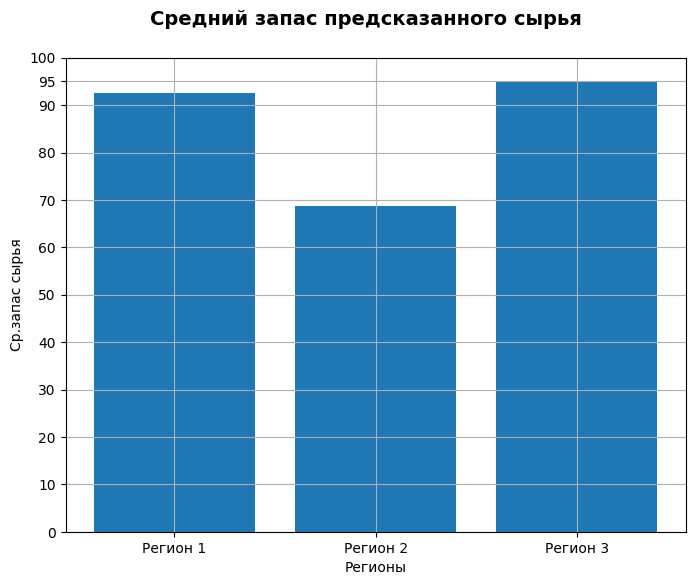

In [65]:
pred_prod_mean = {'Регион 1' : pred_prod_mean_0, 'Регион 2' : pred_prod_mean_1, 'Регион 3' : pred_prod_mean_2}
y_range = list(np.arange(0., 90, 10)) + list(np.arange(90., 100.1, 5))
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Средний запас предсказанного сырья', fontsize=14, fontweight='bold');
fig.subplots_adjust(top=0.9)
ax.bar(pred_prod_mean.keys(), pred_prod_mean.values()) 
ax.set_xlabel('Регионы')
ax.set_ylabel('Ср.запас сырья')
ax.yaxis.set_ticks(y_range)
ax.grid()

In [66]:
for key, value in pred_prod_mean.items():
    print(f'{key}: {round(value,2)}')

Регион 1: 92.59
Регион 2: 68.73
Регион 3: 94.97


<a id='my_section_30'></a>
#### [RMSE](#content_30)

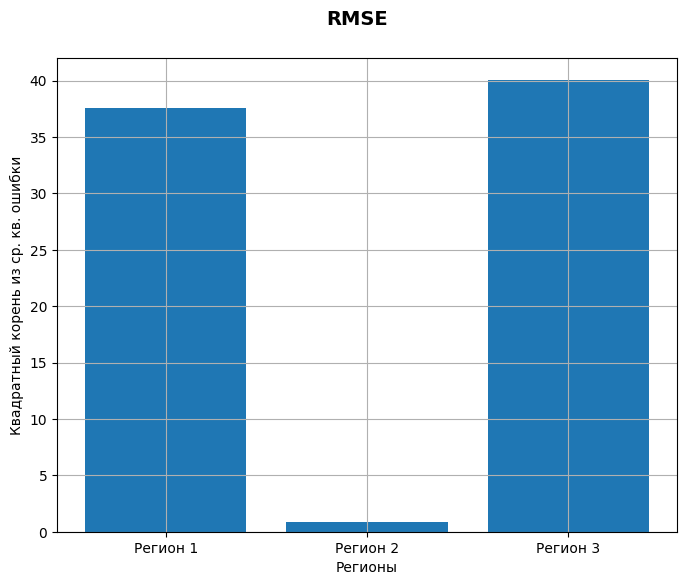

In [67]:
rmse = {'Регион 1' : rmse_0, 'Регион 2' : rmse_1, 'Регион 3' : rmse_2}
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RMSE', fontsize=14, fontweight='bold');
fig.subplots_adjust(top=0.9)
ax.bar(rmse.keys(), rmse.values()) 
ax.set_xlabel('Регионы')
ax.set_ylabel('Квадратный корень из ср. кв. ошибки')
ax.grid()

In [68]:
for key, value in rmse.items():
    print(f'{key}: {round(value,2)}')

Регион 1: 37.58
Регион 2: 0.89
Регион 3: 40.03


<a id='my_section_31'></a>
### [Заключение](#content_31)

Полученные результаты таковы:
- Наибольшее количество сырья предсказано:
  - Регион 3 — 94.97 ед;
  - Регион 1 — 92.59 ед;
  - Регион 2 — 68.73 ед.
- Лучшая точность RMSE:
  - Регион 2 — 0.89;
  - Регион 1 — 37.58;
  - Регион 3 — 40.03.
  
**Вывод:**
Высокая точность региона 2 и предсказанное сырье не учитываем из-за ошибки в данных. Наиболее высокой точностью обладает модель региона 1. Данные модели одинаковые по гиперпараметрам, разная точность обусловлена вариативностью данных.  

<a id='my_section_32'></a>
## [Подготовка к расчёту прибыли](#content_32)

<a id='my_section_33'></a>
### [Сохранение ключевых значений](#content_33)

In [69]:
TOTAL_WELLS = 100_000     # всего скважин
SELECTIVE_WELLS = 500    # выбирают 500 скважин
BEST_WELLS = 200         # из них 200 лучших для разработки
BUDGET = 1*10**10         # бюджет 10 миллиардов на разработку скважин в регионе
BARREL = 450             # 450 руб за бочку
PRODUCT_UNIT = 450_000    # за единицу товара, т.к указано в тыс.

<a id='my_section_34'></a>
### [Рассчёт безубыточной разработки](#content_34)

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 

Произведём рассчёт того, сколько денег должна принести одна скважина, чтобы уйти в 0. Или сколько выделено денег на разработку одной скважины.

In [70]:
zero_profit = BUDGET/BEST_WELLS
print(f'На разработку одной скважины выделено: {zero_profit}')

На разработку одной скважины выделено: 50000000.0


Рассмотрим какое минимальное количество сырья необходимо для окупаемости одной скважины. Произведём рассчёты для: 
1. бочек
2. единиц

In [71]:
# Расчёт минимального к-ва бочек
min_bar = zero_profit/BARREL
min_bar = min_bar+1
# Рассчёт минимального к-ва единиц сырья
min_unit = zero_profit/PRODUCT_UNIT+0.001
print(f'Минимальное количество бочек сырья нужно добыть: {round(min_bar)}')
print(f'Минимальное количество единиц сырья нужно добыть: {round(min_unit,2)}')

Минимальное количество бочек сырья нужно добыть: 111112
Минимальное количество единиц сырья нужно добыть: 111.11


Сравним полученный объём сырья со средним запасом в каждом регионе. Для этого определим функцию.

In [72]:
def stock_comparison(geo_data_0):
    # рассчёт среднего объема сырья в регионе
    mean_vol = geo_data_0['product'].median()
    ans = round(mean_vol-min_unit, 2)
    if mean_vol >= min_unit:
        print(f'Средний объем сырья в регионе'
              f' превосходит минимальный объем'
              f' для безубыточной разработки на: {ans}')
    else:
        print(f'Среднего объёма сырья недостаточно для добычи в регионе,'
              f' убыток составляет: {ans}')

In [73]:
stock_comparison(geo_data_0)

Среднего объёма сырья недостаточно для добычи в регионе, убыток составляет: -19.26


In [74]:
stock_comparison(geo_data_1)

Среднего объёма сырья недостаточно для добычи в регионе, убыток составляет: -54.03


In [75]:
stock_comparison(geo_data_2)

Среднего объёма сырья недостаточно для добычи в регионе, убыток составляет: -16.19


<a id='my_section_35'></a>
### [Определим функцию для рассчёта прибыли](#content_35)

По условию необходимо составить функцию для 200 лучших скважин по результату машинного обучения. При реализации функции необходимо сопоставить индексы.

In [76]:
def prof_reg_200(predictions_valid_0, features_valid_0, target_valid_0):
    # Сопоставления индексов и значений
    predictions_valid_0 = pd.Series(predictions_valid_0, index = features_valid_0.index)
    # Выбор 200 лучших значений
    best_200 = predictions_valid_0.sort_values(ascending=False)[:BEST_WELLS]
    # Рассчёт прибыли
    for_sum = target_valid_0[best_200.index]
    profit = round(for_sum.sum() * PRODUCT_UNIT - BUDGET, 2)
    return profit 


Проведём рассчёт прибыли для регионов

**Регион 1**

In [77]:
profit_0 = prof_reg_200(predictions_valid_0, features_valid_0, target_valid_0)
print(f'По результатам рассчёта прибыль региона №{1} составит: {profit_0}')

По результатам рассчёта прибыль региона №1 составит: 3320826043.14


**Регион 2**

In [78]:
profit_1 = prof_reg_200(predictions_valid_1, features_valid_1, target_valid_1)
print(f'По результатам рассчёта прибыль региона №{1} составит: {profit_1}')

По результатам рассчёта прибыль региона №1 составит: 2415086696.68


**Регион 3**

In [79]:
profit_2 = prof_reg_200(predictions_valid_2, features_valid_2, target_valid_2)
print(f'По результатам рассчёта прибыль региона №{1} составит: {profit_2}')

По результатам рассчёта прибыль региона №1 составит: 2710349963.6


<a id='my_section_36'></a>
### [Заключение](#content_36)

Был проведён рассчёт минимального объёма сырья, который необходимо добыть, чтобы разработка скважины была безубыточной, он составил 111112 бочек. Регионы не обладают по среднему показателю достаточным объёмом сырья для безубыточной разработки:
- Регион 1 — -19.26;
- Регион 2 — -54.03;
- Регион 3 — -16.19.

После выбора 200 скважин с наибольшим запасом сырья для каждого региона была определена функция рассчёта прибыли. Прибыль составла:
- Регион 1 — 3996048877.47;
- Регион 2 — 2485712051.97;
- Регион 3 — 3321754396.24.

Наибольшим запасом сырья обладает Регион 3, потенциально, наиболее прибыльным — Регион 1. 

<a id='my_section_37'></a>
## [Расчёт прибыли и рисков ](#content_37)

В этой главе произведём рассчёт рисков и прибыли. Используем процедуру Bootstrap, определим лучший регион для разработки.
- применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- напишем выводы: предложим регион для разработки скважин и обоснуем выбор.

<a id='my_section_38'></a>
### [Рассчётная часть](#content_38)

Определим функцию для Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Определим функцию.

In [80]:
def profit_destribution(target, predictions, features):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=SELECTIVE_WELLS, replace=True, random_state=state)
        
        predictions_val = pd.Series(predictions, index = features.index)
        pro = predictions_val[target_subsample.index]

        values.append(prof_reg_200(pro, target_subsample, target))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = len(values[values < 0])/len(values)*100
    mean = values.mean()
    print('Средняя прибыль в регионе:', round(mean/10**6, 2), 'млн.руб')
    print('Доверительный интервал от', round(lower/10**6, 2),'млн.руб.', 'до', round(upper/10**6, 2),'млн.руб')
    print('Риск:', round(risk, 2), '%')

**Регион 1**

In [81]:
profit_destribution(target_valid_0, predictions_valid_0, features_valid_0)

Средняя прибыль в регионе: 396.16 млн.руб
Доверительный интервал от -111.22 млн.руб. до 909.77 млн.руб
Риск: 6.9 %


**Регион 2**

In [82]:
profit_destribution(target_valid_1, predictions_valid_1, features_valid_1)

Средняя прибыль в регионе: 456.05 млн.руб
Доверительный интервал от 33.82 млн.руб. до 852.29 млн.руб
Риск: 1.5 %


**Регион 3**

In [83]:
profit_destribution(target_valid_2, predictions_valid_2, features_valid_2)

Средняя прибыль в регионе: 404.4 млн.руб
Доверительный интервал от -163.35 млн.руб. до 950.36 млн.руб
Риск: 7.6 %


<a id='my_section_39'></a>
### [Заключение](#content_39)

По результату исследования лучшим оказался регион №3(Регион № 2 не подходит из-за ошибки в данных). Он обладает наибольшей средней прибылью в регионе: 404.4 млн.руб млн.руб.
Оценка риска показала, что у 1 и 2 региона риски минимальные(6.9%, 1.5%), в то время как у региона 3: 7.6%. Разброс доверительного интервала:
- Регион 1: от -111.22 млн.руб. до 909.77 млн.руб;
- Регион 2: от 33.82 млн.руб. до 852.29 млн.руб;
- Регион 3: от -163.35 млн.руб. до 950.36 млн.руб.